## **Saudi Arabia Used Cars**
### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Cleaning
4. Feature Selection, Feature Engineering
5. Analytics
    - Model Benchmarking and Cross Validation
    - Hyperparameter Tunning
    - Model Evaluation
    - Compare Actual and Predicted Value (Model Limitations)
    - Feature Importance
6. Conclusion
7. Recommendation

---

### **Business Problem Understanding**

**Context**

Syarah Company is an online platform that facilitates the sale and purchase of guaranteed used cars. On Syarah.com, there are three parties involved in the used car trading process: the seller, the buyer, and Syarah Company as an intermediary. The online platform helps used car sellers reach consumers more easily and quickly with competitive selling prices. Additionally, buyers can more easily search for used cars through ads that can be filtered according to preferences displayed on Syarah.com. Sellers can advertise cars by listing their specifications and free to set the selling price. 

**Problem Statement & Solution**

The Saudi Arabian used car market has experienced notable growth, with a strong CAGR projected for the coming years. The Saudi Arabian used car market, valued at USD 4.91 billion in 2021, is projected to reach USD 8.69 billion by 2027, with a 7.36% CAGR growth expected.

One of the biggest challenges for Syarah Company is `preventing overpricing and underpricing of used cars` that price being determined by sellers. A price prediction model based on car specifications is needed, which Syarah.com can easily use to `provide price recommendations` to sellers. This means that after the seller inputs the specifications, a price recommendation will automatically appear, which the seller can use as a reference in setting the price.

**Goals**

- Having a price recommendation feature on Syarah.com can make it easier for sellers, potentially attracting more sellers to list their used cars on Syarah.com. This, in turn, increases the company's revenue due to the increase in charges applied, such as shipping charges and so on.
- More people will buy used cars and transact on Syarah.com because of the well-fitted price offers according to the car specifications.

From the two goals above, if more transactions occur, it will achieve the main goal, which is increasing the company's profit.

**Analytic Approach**

Therefore, what we need to do is analyze the data to find patterns from the existing features that distinguish one car from another.

Next, we will `build a regression model` that will help the company provide a price prediction tool for newly listed used cars, which will be useful for sellers in determining the selling price of used cars.

**Metrics Evaluation**

In the data cleaning process, not all outliers are removed (only extreme outliers). Therefore, the data will still have some outliers. The evaluation metrics used should not be sensitive to outliers. Evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Root Mean Squared Percentage Error (RMSPE) are not suitable for this dataset because they are sensitive to outliers.

The evaluation metrics used to measure the model's performance are:

- Mean Absolute Percentage Error (MAPE): the average percentage error produced by the regression model
- Mean Absolute Error (MAE): the average absolute value of the error
- R-squared (R2): R-squared if the final selected model is a linear model. The R-squared value is used to determine how well the model can represent the overall variance of the data. The closer it is to 1, the better the model fits the observational data. However, this metric is not valid for non-linear models.

`MAPE will be the primary reference for selecting the best model`; the smaller the MAPE, the better the model.

In [1]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Preprocess
# splitting
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV 
# pipeline
from  sklearn.pipeline import Pipeline
# scaling & encoding
from sklearn.preprocessing import RobustScaler,OneHotEncoder
import category_encoders as ce
# Convert preprocess / transform
from sklearn.compose import ColumnTransformer
# enable iterative
from sklearn.experimental import enable_iterative_imputer
# missing value (imputer)
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

# Model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor, StackingRegressor, BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

#metrics
from sklearn.metrics import make_scorer, mean_absolute_error, mean_absolute_percentage_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset
df = pd.read_csv('data_saudi_used_cars.csv')
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


## **Data Understanding**

**Context**

The dataset contains 5624 records of used cars collected from syarah.com. Each row represents a used car. Other information regarding each car is the brand name, model, manufacturing year, origin, options, engine capacity, transmission type, mileage that the car covered, region price, and negotiable.


**Column**
-	Type: Type of used car.
-	Region: The region in which the used car was offered for sale.
-	Make: The company name.
-	Gear_Type: Gear type size of used car.
-	Origin: Origin of used car.
-	Options: Options of used car.
-	Year: Manufacturing year.
-	Engine_Size: The engine size of used car.
-	Mileage: Mileage of used car	
-	Negotiable: True if the price is 0, that means it is negotiable.
-	Price: Used car price.


## **Data Cleaning**

**Check Missing Value**

In [3]:
# Check General Information (Data Type, Missing Value, % Missing Value, Unique, and Sample Unique)

list_info = []
for li in df.columns :
    list_info.append([
        li,
        df[li].dtype, # Extract Data Type
        df[li].isna().sum(), # Extract Missing Value
        round(df[li].isna().sum()/len(df)*100,2), # Extract % Missing Value
        df[li].nunique(), # Extract Unique
        df[li].unique()[:4] # Extract Sampel Unique
    ])
df_info = pd.DataFrame(list_info, columns =['Column Name, Data Type, Missing Value, % Missing Value, Unique, Sample Unique'.split(', ')])
df_info

,Column Name,Data Type,Missing Value,% Missing Value,Unique,Sample Unique
0,Type,object,0,0.0,347,"[Corolla, Yukon, Range Rover, Optima]"
1,Region,object,0,0.0,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer]"
2,Make,object,0,0.0,58,"[Toyota, GMC, Land Rover, Kia]"
3,Gear_Type,object,0,0.0,2,"[Manual, Automatic]"
4,Origin,object,0,0.0,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,object,0,0.0,3,"[Standard, Full, Semi Full]"
6,Year,int64,0,0.0,50,"[2013, 2014, 2015, 2020]"
7,Engine_Size,float64,0,0.0,71,"[1.4, 8.0, 5.0, 2.4]"
8,Mileage,int64,0,0.0,1716,"[421000, 80000, 140000, 220000]"
9,Negotiable,bool,0,0.0,2,"[True, False]"


No Missing Value.

**Check Outliers**

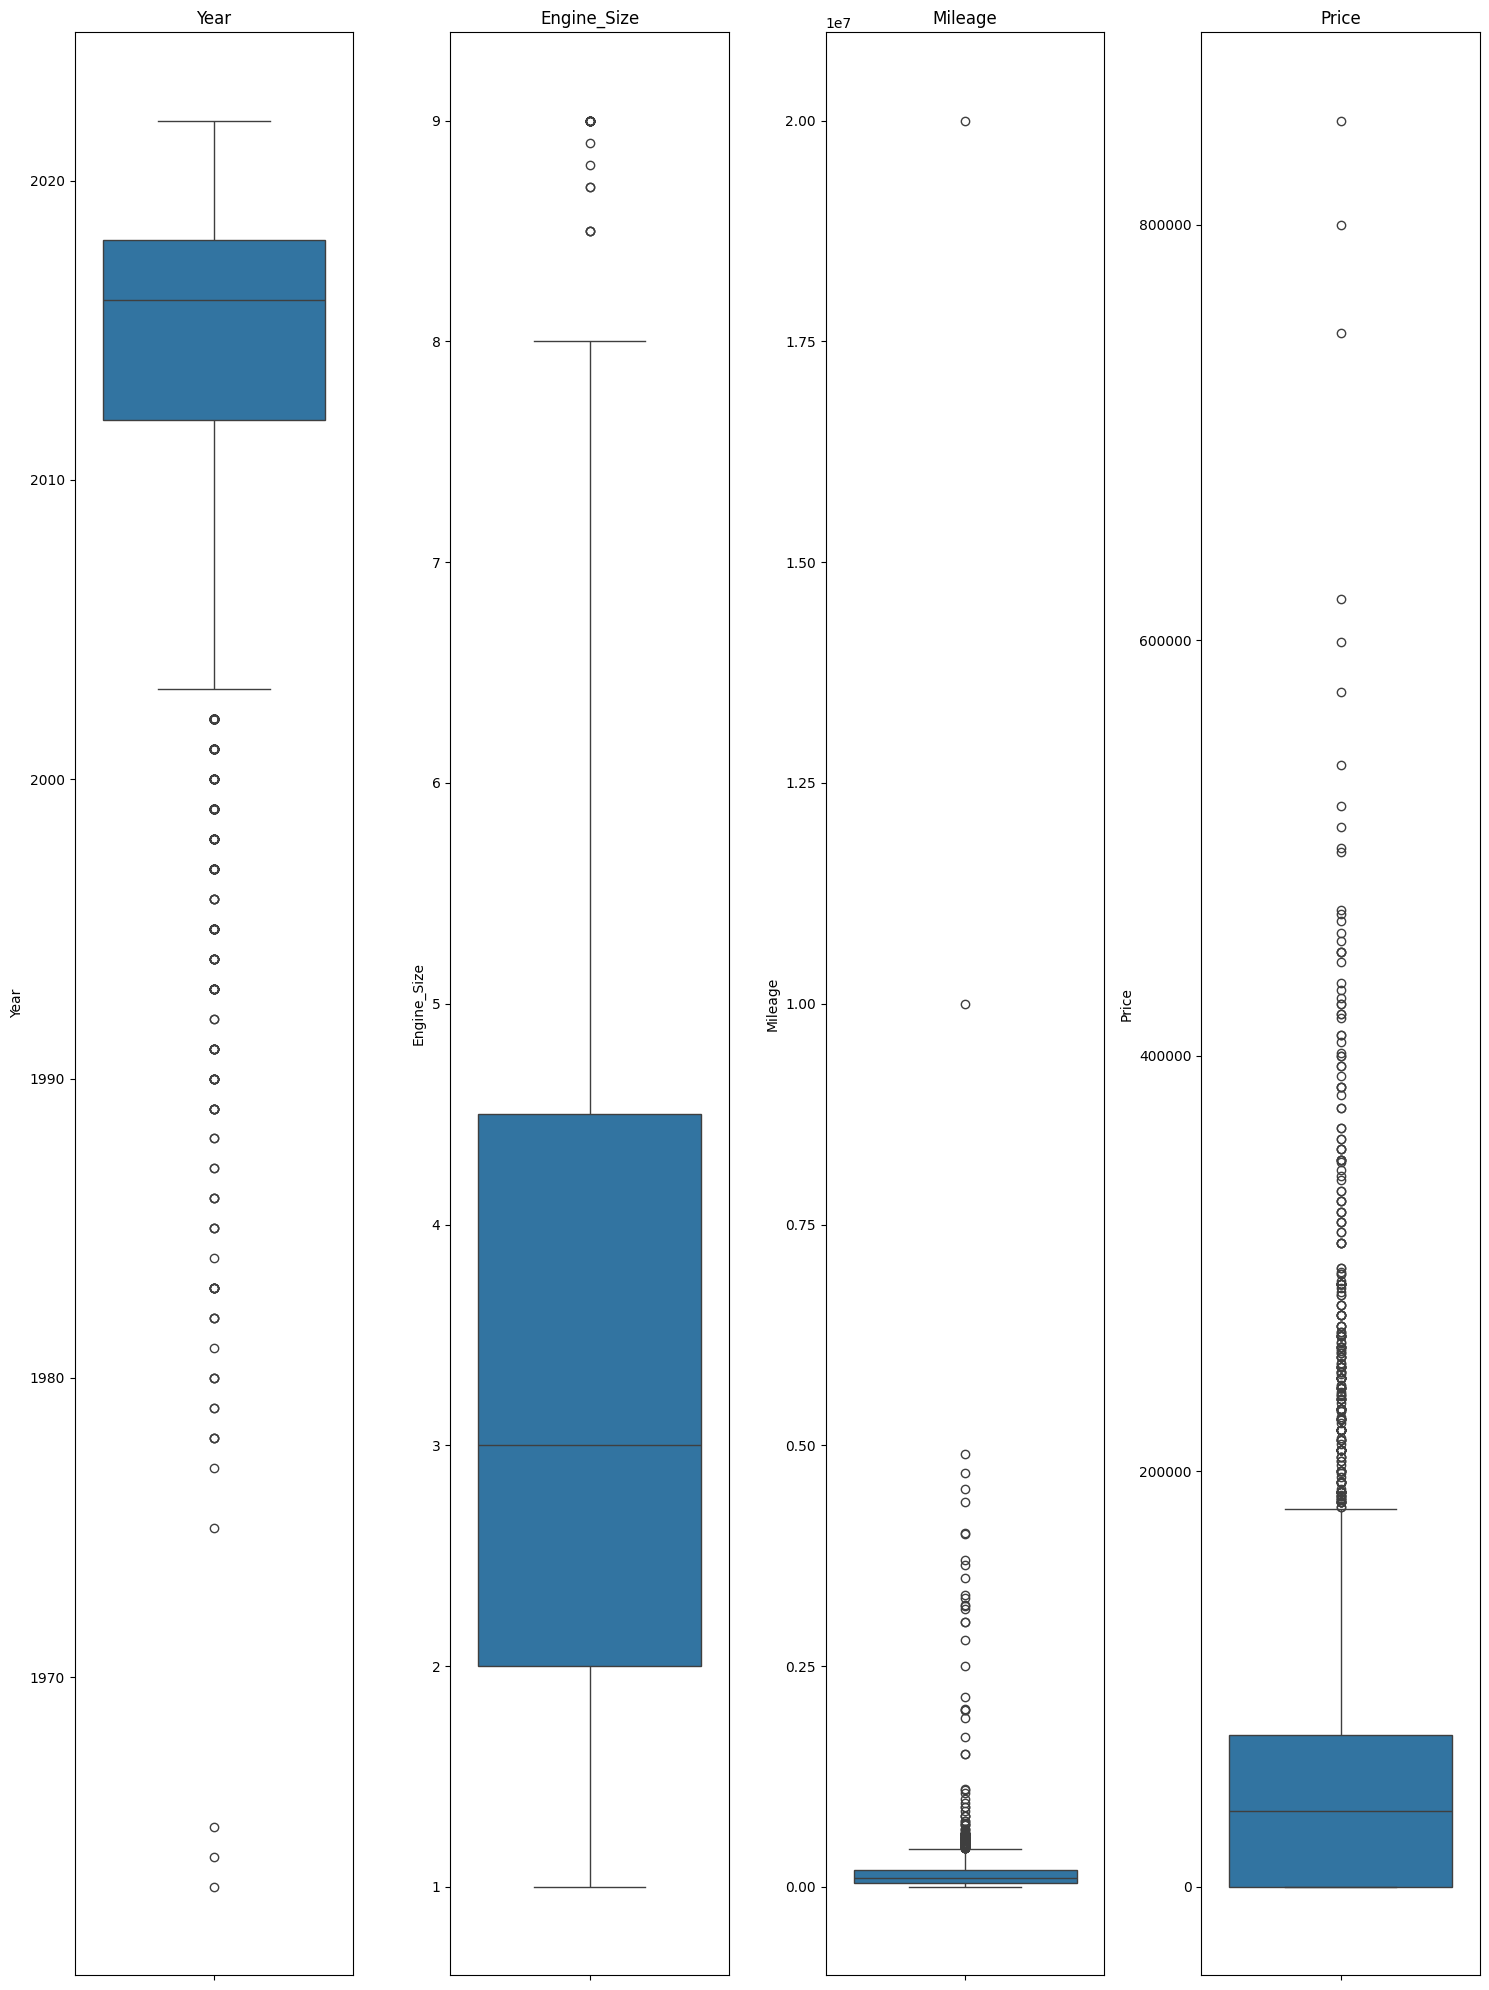

In [4]:
# Check Outliers - boxplot

# Select numeric column
num_column = df.select_dtypes(include = ['float64', 'int64']).columns
# Total of numeric column
Totalnum_column = len(num_column) 
# create 4 boxplots in 1 series
num_row = (Totalnum_column // 4) + (Totalnum_column % 4 >0) 

# Display boxplots for all numerical column
def boxplot_outliers():
    plt.figure(figsize=(15,20))

    for i, column in enumerate(num_column,1) :
        plt.subplot(num_row, 4, i)
        sns.boxplot(df[column].dropna())
        plt.title(column)

    plt.tight_layout()
    plt.show()
boxplot_outliers()

Based on the boxplot, there are outliers in all numeric columns. Not all outliers will be removed when creating a prediction model, only extreme outliers will be removed, so it is necessary to define which are extreme outliers from each numerical column.

In [5]:
# Check percentage of outliers in each numerical column
def cal_percentage_extreme_outliers(df):
    extreme_outliers_percentage = {}    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Count IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Determine upper and lower limits for extreme outliers
        extreme_lower = Q1 - 3 * IQR
        extreme_upper = Q3 + 3 * IQR

        extreme_outliers = df[(df[column] < extreme_lower) | (df[column] > extreme_upper)]
        extreme_outliers_percentage[column] = len(extreme_outliers) / len(df) * 100
    
    return extreme_outliers_percentage

extreme_outliers_percentage = cal_percentage_extreme_outliers(df)
extreme_outliers_percentage


{'Year': 1.2624466571834994,
 'Engine_Size': 0.0,
 'Mileage': 0.8001422475106686,
 'Price': 1.422475106685633}

Extreme outliers are only found in the 'Year', 'Mileage', and 'Price' columns.

In [6]:
def calculate_outliers_benchmarks(df, columns):
    benchmarks = {}
    for column in columns:
        if column in df.columns:
            # Count IQR
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Determine upper and lower limits for extreme outliers
            reg_lower = Q1 - 1.5 * IQR
            reg_upper = Q3 + 1.5 * IQR
            extreme_lower = Q1 - 3 * IQR
            extreme_upper = Q3 + 3 * IQR
            benchmarks[column] = {
                'Regular Lower Bound': reg_lower,
                'Regular Upper Bound': reg_upper,
                'Extreme Lower Bound': extreme_lower,
                'Extreme Upper Bound': extreme_upper
            }
    return benchmarks

# Column with Extreme Outliers, except booking changes column
columns_outlier = ['Year', 'Mileage', 'Price']

# Calculate the benchmarks for specified columns
benchmarks = calculate_outliers_benchmarks(df, columns_outlier)
benchmarks_df = pd.DataFrame(benchmarks).transpose()
benchmarks_df


,Regular Lower Bound,Regular Upper Bound,Extreme Lower Bound,Extreme Upper Bound
Year,2003.00,2027.00,1994.0,2036.0
Mileage,-199000.00,433000.00,-436000.0,670000.0
Price,-109398.75,182331.25,-218797.5,291730.0


Outliers that **will be removed** from the 'Year', 'Mileage', and 'Price' columns are those that are **outside the Extreme Lower Bound and Extreme Upper Bound**.

In [7]:
# Remove Outliers
def remove_extr_outliers(df,columns, benchmarks):
    for column in columns :
        extreme_lower = benchmarks[column]['Extreme Lower Bound']
        extreme_upper = benchmarks[column]['Extreme Upper Bound']
        df = df[(df[column] >= extreme_lower) & (df[column] <= extreme_upper)]
        return df

df = remove_extr_outliers(df,columns_outlier, benchmarks)
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


**Check Faulty Data and Remove White Space**

**1. Check Faulty Data**

In [8]:
# Summary statistics of numerical features
df.describe()

,Year,Engine_Size,Mileage,Price
count,5553.000000,5553.000000,5.553000e+03,5553.000000
mean,2014.459932,3.287574,1.482948e+05,53427.066991
std,4.819758,1.509431,3.568259e+05,70131.977890
min,1994.000000,1.000000,1.000000e+02,0.000000
25%,2013.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,37000.000000
75%,2018.000000,4.500000,1.950000e+05,73000.000000
max,2022.000000,9.000000,2.000000e+07,850000.000000


**Handling Faulty Data: 'Price' = 0**

Based on that summary statistics of numerical features there is data **'Price' = 0**, which indicates the car can be obtained for free. This **does not make sense** because the context is the sale of used cars which should have a price that needs to be paid.


In [9]:
# Check percentage of data with 'Price' = 0
price0 = df[df['Price'] == 0]['Price'].count()
price0 = price0 / len(df['Price']) * 100
price0

31.676571222762473

Percentage of data with 'Price' = 0 (31.7%) is more than 10%, but the data **still needs to be dropped**, because incorrect value data can cause incorrect prediction results.

In [10]:
# Drop 'Price' = 0 
df = df[df['Price'] != 0]

In [11]:
# Check another faulty data of Price
df.describe()

,Year,Engine_Size,Mileage,Price
count,3794.000000,3794.000000,3.794000e+03,3794.000000
mean,2015.095414,3.175698,1.428029e+05,78197.285978
std,4.364534,1.458133,3.796629e+05,72539.414364
min,1994.000000,1.000000,1.000000e+02,1.000000
25%,2014.000000,2.000000,4.867225e+04,35000.000000
50%,2016.000000,2.700000,1.030000e+05,58000.000000
75%,2018.000000,4.000000,1.829435e+05,95000.000000
max,2021.000000,9.000000,2.000000e+07,850000.000000


**Handling Faulty Data: 'Price' = 1**

Based on that summary statistics of numerical features there is data **'Price' = 1**, which indicates the unreasonable price of used car.

Based on this article : https://ksa.carswitch.com/en/riyadh/used-cars/under-35000-for-sale-in-riyadh 
- The cheapest used car for sale in Riyadh is priced at 8000.

Percentage of data with 'Price' < 8000 will be checked.

In [12]:
# Check percentage of data with 'Price' < 8000
underprc = df[df['Price'] < 8000]['Price'].count()
underprc = underprc / len(df['Price']) * 100
underprc

2.134949920927781

Percentage of data with 'Price' < 8000 (1.46%) is lower than 10% --> can be dropped because the percentage is lower than 10% and data that used in the model or algorithm is data that is expected to provide correct and reliable predictions.

In [13]:
# Drop data with 'Price' < 8000
df = df[df['Price'] > 8000]

In [14]:
# Check other faulty data
df.describe()

,Year,Engine_Size,Mileage,Price
count,3710.000000,3710.000000,3.710000e+03,3710.000000
mean,2015.086523,3.185580,1.433854e+05,79906.690836
std,4.292589,1.458791,3.823080e+05,72450.147532
min,1994.000000,1.000000,1.000000e+02,9000.000000
25%,2014.000000,2.000000,5.000000e+04,37000.000000
50%,2016.000000,2.700000,1.045055e+05,59250.000000
75%,2018.000000,4.000000,1.830000e+05,95000.000000
max,2021.000000,9.000000,2.000000e+07,850000.000000


**Handling Faulty Data: 'Mileage'**

Based on that statistic summary, there is an extreme maximum value of 'Mileage' = 20,000,000 km, which that value is not reliable.

Based on ksa.motory.com, the average mileage per year is assumed to be 16,000 miles for used cars in Saudi Arabia, which is equivalent to 25,750 km.

The oldest car manufacturing year in the dataset after cleaning extreme outliers is 1994 (30 years ago). Therefore, the maximum possible mileage of a car as of this year (2024) is 772,500 km (result of average mileage multiple with the difference between the current year and the car manufacturing year).

---

The above statement is made assuming the dataset was taken in 2024.

Therefore, data with 'Mileage' > 772,500 will be dropped because it is not reliable as a reference for prediction.

In [15]:
# Check percentage of data with 'Mileage' > 772500
overmil = df[df['Mileage'] > 772500]['Mileage'].count()
overmil = overmil / len(df['Mileage']) * 100
overmil

0.5121293800539084

Percentage of data with 'Mileage' > 772,500 (0.66%) is lower than 10% --> can be dropped because the percentage is lower than 10%, so data that used in the model or algorithm is data that is expected to provide correct and reliable predictions.

In [16]:
# Drop data with 'Mileage' > 772500
df = df[df['Mileage'] < 772500]

**2. Remove White Space**

In [17]:
# removing whitespace from all string columns while leaving other data types intact
df = df.apply(lambda i: i.str.strip() if i.dtype == 'object' else i)

**Check Duplicate**

In [18]:
# Check Duplicate
duplicate = df[df.duplicated()]
duplicate

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000


In [19]:
# Remove duplicates, keeping the first occurrence
df = df.drop_duplicates()

## **Feature Selection**

Before dropping unused column, it is necessary to determine which features are related to the target (price). 

1. Numeric Feature

Determining numeric features will be assisted by inferential statistical analysis in the form of correlation analysis as an argument that can be used apart from based on domain knowledge of cars.

<Axes: xlabel='Price', ylabel='Density'>

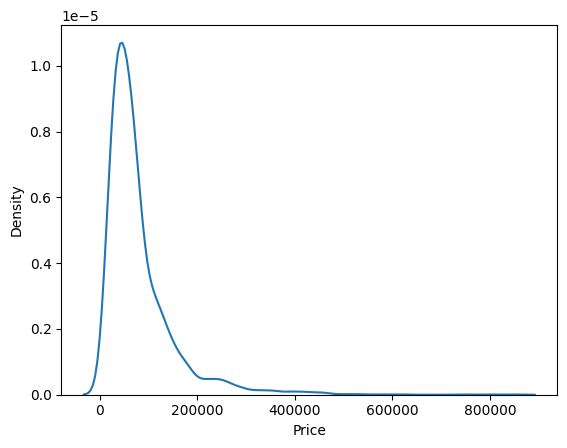

In [20]:
# Determine numeric feature will be used (feature selection - Heatmap Corelation between all numeric feature and target (Price))

# Check distribution of Price for selecting the type of correlation
sns.kdeplot(df['Price'])

In [21]:
# Check P-Value of Price for selecting the type of correlation
sc.shapiro(df['Price'])

ShapiroResult(statistic=0.7176883505814358, pvalue=8.64610383656437e-62)

Based on kdeplot and P-Value < 0.05 indicates that 'Price' is not normally distributed so the non-parametric correlation test (Spearman) will be used.

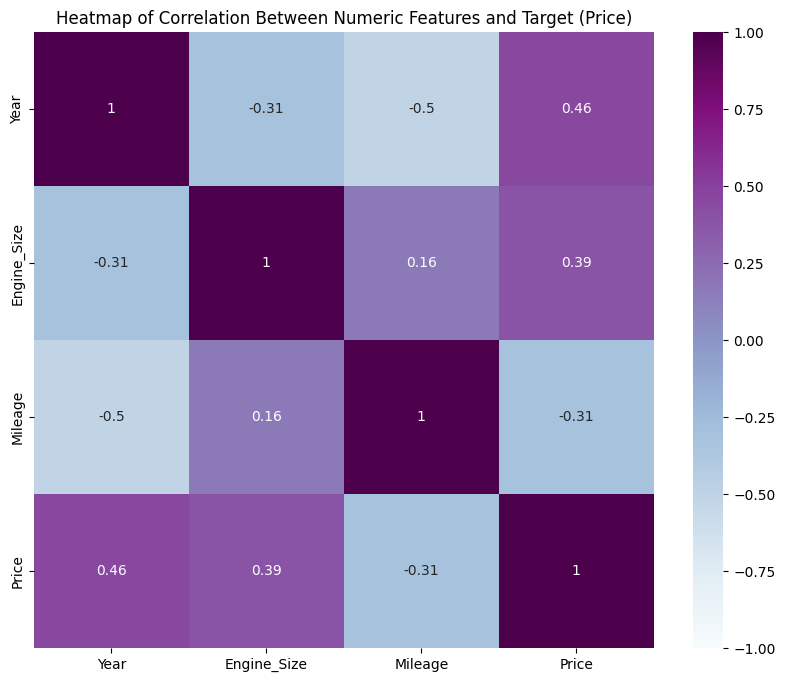

In [22]:
# Find the correlation using Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Year', 'Engine_Size', 'Mileage', 'Price']].corr('spearman'), annot=True, cmap='BuPu', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Between Numeric Features and Target (Price)')
plt.show()

The strength of the correlation : https://datatab.net/tutorial/spearman-correlation

- 0.0 - <0.1 --> no correlation

- 0.1 - <0.3 --> low correlation

- 0.3 - <0.5 --> medium correlation

- 0.5 - <0.7 --> high correlation

- 0.7 - 1 --> very high correlation

- Coefficient between -1 and less than 0, there is a negative correlation

- Coefficient greater than 0 and greater than 1, there is a positive correlation.

---

Based on heatmap: 
- 'Year' has `positive medium correlation` with price.
- 'Engine_Size' `positive low correlation` with price.
- 'Mileage' has `negative low correlation` with price.

All Numerical features **will be used**

In [23]:
df_info

,Column Name,Data Type,Missing Value,% Missing Value,Unique,Sample Unique
0,Type,object,0,0.0,347,"[Corolla, Yukon, Range Rover, Optima]"
1,Region,object,0,0.0,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer]"
2,Make,object,0,0.0,58,"[Toyota, GMC, Land Rover, Kia]"
3,Gear_Type,object,0,0.0,2,"[Manual, Automatic]"
4,Origin,object,0,0.0,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,object,0,0.0,3,"[Standard, Full, Semi Full]"
6,Year,int64,0,0.0,50,"[2013, 2014, 2015, 2020]"
7,Engine_Size,float64,0,0.0,71,"[1.4, 8.0, 5.0, 2.4]"
8,Mileage,int64,0,0.0,1716,"[421000, 80000, 140000, 220000]"
9,Negotiable,bool,0,0.0,2,"[True, False]"


2. Categorical Feature

'Negotiable' feature is not related to the actual price of the used car, but rather describes negotiation process. Therefore, 'Negotiable' feature can be dropped. 

In [24]:
# drop unused column : 'Negotiable'
df = df.drop('Negotiable', axis =1)
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


Determining other categorical features will be assisted by ANOVA (for 'Type', 'Region', 'Make', 'Gear_Type', 'Origin', and Options') as an argument that can be used apart from based on domain knowledge of cars.

In [25]:
# ANOVA test for 'Type', 'Region', 'Make', 'Gear_Type', 'Origin', and 'Options' with Price

feat_anova = ['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options']

for fa in feat_anova:
    model_anova = ols(f'Price ~ {fa}', data=df).fit()
    anova_table = sm.stats.anova_lm(model_anova, typ=2)
    print(anova_table)

                sum_sq      df         F  PR(>F)
Type      1.108599e+13   312.0  14.41433     0.0
Residual  8.319537e+12  3375.0       NaN     NaN
                sum_sq      df         F        PR(>F)
Region    3.997301e+11    26.0  2.961468  7.310086e-07
Residual  1.900580e+13  3661.0       NaN           NaN
                sum_sq      df          F         PR(>F)
Make      7.212218e+12    55.0  39.059835  1.895928e-319
Residual  1.219331e+13  3632.0        NaN            NaN
                 sum_sq      df         F        PR(>F)
Gear_Type  2.540640e+11     1.0  48.89861  3.186224e-12
Residual   1.915146e+13  3686.0       NaN           NaN
                sum_sq      df          F        PR(>F)
Origin    7.300347e+11     3.0  48.003155  1.996881e-30
Residual  1.867549e+13  3684.0        NaN           NaN
                sum_sq      df           F         PR(>F)
Options   2.316415e+12     2.0  249.749346  1.918880e-102
Residual  1.708911e+13  3685.0         NaN            NaN


PR(>F) indicates P-Value. 

- If p value < 0.05: there is a significant difference in average price between the categories of the feature, so the feature will be used.
- P-Value of all categorical features < 0.05 --> there is a price difference between various categories for each feature, then 'Type', 'Region', 'Make', 'Gear_Type', 'Origin', and 'Options' are features that **will be used**.

`All categorical features will be used, except 'Negotiable'`

**Check & Save Clean Data**

In [26]:
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


In [27]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,3688.000000,3688.000000,3688.000000,3688.000000
mean,2015.124458,3.187663,127664.780098,80179.070770
std,4.243340,1.459565,107695.114173,72548.118361
min,1994.000000,1.000000,100.000000,9000.000000
25%,2014.000000,2.000000,49441.250000,37000.000000
50%,2016.000000,2.700000,104000.000000,59750.000000
75%,2018.000000,4.000000,181000.000000,95000.000000
max,2021.000000,9.000000,749000.000000,850000.000000


Based on that statistical summary, it can be concluded that used car data that can be applied by the model has the following numerical characteristics:
- Used cars with a price range of 9000 - 850,000 SR
- Used cars with a manufacturing year range of 1994 - 2021; an engine size range of 1 - 9 L; and a Mileage range of 100 - 749,000 KM

In [28]:
# Save DataFrame as CSV file
df.to_csv('clean_data_saudi_used_cars.csv')

## **Splitting Data**

In [29]:
# Spliting Data

X = df.drop('Price', axis =1)
y = df['Price']

xtrain, xtest, ytrain, ytest = train_test_split(
    X, y,
    random_state= 2024,
    test_size= 0.2,
)

## **Feature Engineering**

In [30]:
df_info

,Column Name,Data Type,Missing Value,% Missing Value,Unique,Sample Unique
0,Type,object,0,0.0,347,"[Corolla, Yukon, Range Rover, Optima]"
1,Region,object,0,0.0,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer]"
2,Make,object,0,0.0,58,"[Toyota, GMC, Land Rover, Kia]"
3,Gear_Type,object,0,0.0,2,"[Manual, Automatic]"
4,Origin,object,0,0.0,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,object,0,0.0,3,"[Standard, Full, Semi Full]"
6,Year,int64,0,0.0,50,"[2013, 2014, 2015, 2020]"
7,Engine_Size,float64,0,0.0,71,"[1.4, 8.0, 5.0, 2.4]"
8,Mileage,int64,0,0.0,1716,"[421000, 80000, 140000, 220000]"
9,Negotiable,bool,0,0.0,2,"[True, False]"


In [31]:
# Create Pipeline

## 1. Separating numeric and categorical data
oh_cat_feat = ['Gear_Type', 'Origin', 'Options'] # categorical feature with <= 5 categories
binary_cat_feat = ['Type', 'Region', 'Make'] # categorical feature with > 5 categories
num_feat = ['Year', 'Engine_Size', 'Mileage']

## 2. Combine transformer using column transformer
prepros = ColumnTransformer([
    ('num', RobustScaler(), num_feat),
    ('oh_cat', OneHotEncoder(), oh_cat_feat),
    ('binary_cat', ce.BinaryEncoder(), binary_cat_feat)
], remainder='passthrough')

prepros

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', RobustScaler(),
                                 ['Year', 'Engine_Size', 'Mileage']),
                                ('oh_cat', OneHotEncoder(),
                                 ['Gear_Type', 'Origin', 'Options']),
                                ('binary_cat', BinaryEncoder(),
                                 ['Type', 'Region', 'Make'])])

- Doesn't need to use an imputer because there are no missing values ​​in the dataset.
- Scaling is applied to equalize the scale of all numerical features using the Robust Scaler method (a method that is not sensitive to outliers). Robust Scaler is applied because there are still outliers in the dataset, when data cleaning extreme outliers are removed.
- Encoding is applied to transform categorical data into numerical format. One Hot Encoder is used for categorical features with <= 5 categories, while Binary Encoder is used for categorical features with > 5 categories.

## **Model Benchmarking**

Several regression models will be tried to predict prices. The models that will be used are:
- Base Model (KNN Regressor, Decision Tree Regressor, and Linear Regression)
- Voting & Stacking (Soft Voting, Stacking - KNN, Stacking - DT, Stacking - Linear Regression)
- Bagging (Linear Regression and Random Forest Regressor)
- Boosting (AdaBoost Regressor, Gradient Boosting Regressor, and XGBoost Regressor)

In [32]:
# Model Benchmarking

# Base Model
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
linreg = LinearRegression()

# Soft Voting
soft = VotingRegressor([
    ('KNN', knn),
    ('DT', dt),
    ('LinearReg', linreg)
])

# Stacking - KNN
stck_knn = StackingRegressor([
    ('KNN', knn),
    ('DT', dt),
    ('LinearReg', linreg)
], final_estimator=KNeighborsRegressor())

# Stacking - DT
stck_dt = StackingRegressor([
    ('KNN', knn),
    ('DT', dt),
    ('LinearReg', linreg)
], final_estimator=DecisionTreeRegressor())

# Stacking - LinReg
stck_linreg = StackingRegressor([
    ('KNN', knn),
    ('DT', dt),
    ('LinearReg', linreg)
]) # By Default log reg

# Bagging
bagging_mod = BaggingRegressor(estimator=LinearRegression())
rf_mod = RandomForestRegressor(random_state=42)

# Boosting
adaboost = AdaBoostRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor()


listmodel = [knn, dt, linreg, soft, stck_knn, stck_dt, stck_linreg, bagging_mod, rf_mod, adaboost, gb, xgb]
modelname = ['KNN', 'Decission Tree', ' LinReg', ' Soft Voting', 'Stacking - KNN', 'Stacking - DT', 'Stacking - LinReg', 'Bagging - LinReg', 'Random Forest Regressor', 'adaboost', 'gb', 'xgb']

## **Model Evaluation**

In [33]:
# Model Benchmarking Result (with cross validation)
result = []

for i, j in zip(listmodel, modelname):
    pipe = Pipeline([
        ('Prepros', prepros),
        ('Model', i)
    ])
    
    mape_score = cross_val_score(pipe, xtrain, ytrain, cv=5, scoring='neg_mean_absolute_percentage_error')
    mae_score = cross_val_score(pipe, xtrain, ytrain, cv=5, scoring='neg_mean_absolute_error')
    r2_score = cross_val_score(pipe, xtrain, ytrain, cv=5, scoring='r2')
    
    result.append({
        'Model': j,
        'MAPE Score Cross Validation': mape_score,
        'Avg MAPE': mape_score.mean(),
        'MAE Score Cross Validation': mae_score,
        'Avg MAE': mae_score.mean(),
        'R2 Score Cross Validation': r2_score,
        'Avg R2':r2_score.mean()
    })

# Convert the results to a DataFrame and sort by Avg MAPE
result_df = pd.DataFrame(result).round(4).sort_values('Avg MAPE')
result_df


,Model,MAPE Score Cross Validation,Avg MAPE,MAE Score Cross Validation,Avg MAE,R2 Score Cross Validation,Avg R2
6,Stacking - LinReg,"[-145444337069.82135, -0.27643934603257486, -4...",-1.567290e+12,"[-6702878905840026.0, -18100.653503020316, -2....",-7.382159e+16,"[-7.695004673302218e+21, 0.7599936891885666, -...",-2.193462e+24
9,adaboost,"[-1.3733940323470402, -1.4528798111792853, -1....",-1.354600e+00,"[-58444.388749999314, -61134.80601641586, -536...",-5.938326e+04,"[0.21277206477034094, -0.04014338307060861, 0....",1.190000e-01
7,Bagging - LinReg,"[-0.662653936592852, -0.6225517798021479, -0.7...",-6.488000e-01,"[-33519.14331919926, -31636.175206875105, -356...",-3.359269e+04,"[0.5210955359452865, 0.493939662033997, 0.3928...",4.811000e-01
2,LinReg,"[-0.652937434515829, -0.6198210636162939, -0.6...",-6.420000e-01,"[-33460.350423728814, -31473.6, -35740.0898305...",-3.359023e+04,"[0.5208225484855618, 0.4905829937531433, 0.391...",4.808000e-01
5,Stacking - DT,"[-0.3469740897711448, -0.3895689798226582, -0....",-3.859000e-01,"[-24849.674576271187, -26648.915254237287, -27...",-2.737778e+04,"[0.6674969010927494, 0.43253449611631223, 0.49...",4.398000e-01
1,Decission Tree,"[-0.34568087848458734, -0.32651848599766015, -...",-3.465000e-01,"[-24596.3593220339, -22855.694915254237, -2536...",-2.499872e+04,"[0.46280532842178346, 0.5910887500668718, 0.53...",4.946000e-01
3,Soft Voting,"[-0.35008042683069707, -0.3387650473762883, -0...",-3.451000e-01,"[-20724.602966101695, -20048.095367231635, -22...",-2.118813e+04,"[0.7553764116696091, 0.7261984814188844, 0.617...",7.234000e-01
0,KNN,"[-0.34063028152498476, -0.337273744049905, -0....",-3.423000e-01,"[-20347.457627118645, -19984.627118644068, -23...",-2.134954e+04,"[0.7566217104621795, 0.7168704849670919, 0.595...",7.159000e-01
10,gb,"[-0.33100587546782095, -0.337428657857092, -0....",-3.259000e-01,"[-21082.94237967761, -20692.524687185654, -237...",-2.202065e+04,"[0.7478240809899913, 0.7118613836260554, 0.609...",7.120000e-01
4,Stacking - KNN,"[-0.2770890098337678, -0.3048363597952116, -0....",-2.949000e-01,"[-18823.309491525426, -20835.746779661018, -22...",-2.071254e+04,"[0.7796192966702764, 0.6702258394347247, 0.647...",7.150000e-01


Best 3 Models based on the smallest Avg MAPE value are:
- Random Forest Regressor (27.9%)
- XGBoost (27.96%)
- Stacking - KNN (29.5%)

**Apply Model to test dataset**

In [34]:
score_mae = []
score_mape = []

# Apply 3 best prediction model in test dataset
for i in [rf_mod,xgb, stck_knn]:

    model = Pipeline([
        ('preprocessing', prepros),
        ('model', i)
        ])

    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    score_mae.append(mean_absolute_error(ytest, ypred))
    score_mape.append(mean_absolute_percentage_error(ytest, ypred))

test_result = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape}, index=['Random Forest', 'XGB Regressor', 'Stacking - KNN'])
test_result

,MAE,MAPE
Random Forest,15509.723338,0.253817
XGB Regressor,15561.702365,0.267441
Stacking - KNN,17940.711924,0.278928


There is a **decrease in error when the model is applied to the test dataset** and there is **no indication of overfitting or underfitting**, as seen from the insignificant decrease in MAPE value.

## **Hyperparameter Tunning**

Hyperparameter Tunning will be applied on the 3 best models to determine the best parameters of each model.
Best 3 Models (Smallest MAPE value without looking at positive/negative signs) = Random Forest Regressor, XGBoost, and Stacking - KNN.

In [36]:
# Define the hyperparameters for Best 3 models
allparam = {
    'RandomForestRegressor': {
        'model__n_estimators': np.arange(100, 1100, 100),
        'model__max_depth': np.arange(3, 21, 2),
        'model__min_samples_split' : np.arange(1, 21, 2),
        'model__min_samples_leaf' : np.arange(1, 21, 2)
    },
    'XGBRegressor': {
        'model__n_estimators': np.arange(100, 1100, 100),
        'model__max_depth': np.arange(3, 21, 2),
        'model__learning_rate' : np.arange(0.1, 1.1, 0.1),
        'model__subsample' : np.arange(0.5, 1.1, 0.1),
    },
    'StackingRegressor - KNN': {
        'model__cv': np.arange(1, 20)
    }
}

# Define Best 3 models
allmodel = {
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'StackingRegressor - KNN': StackingRegressor([
        ('KNN', KNeighborsRegressor()),
        ('DT', DecisionTreeRegressor()),
        ('LinearReg', LinearRegression())
    ], final_estimator=KNeighborsRegressor())
}

# Place for results
best_model = {}
best_param = {}
best_score = {}

# Looping hyperparameter tuning for best 3 models
for i in allmodel:
    pipe = Pipeline([
        ('preprocess', prepros),
        ('model', allmodel[i])
    ])
    grid = RandomizedSearchCV (pipe, allparam[i], cv=5, scoring='neg_mean_absolute_percentage_error', n_iter=20, n_jobs=-1)
    grid.fit(xtrain, ytrain)
    
    best_model[i] = grid.best_estimator_
    best_param[i] = grid.best_params_
    best_score[i] = grid.best_score_

# Result
for i in allmodel:
    print(f"Best {i} parameters: {best_param[i]}")
    print(f"Best {i} MAPE: {best_score[i]}")


Best RandomForestRegressor parameters: {'model__n_estimators': 700, 'model__min_samples_split': 3, 'model__min_samples_leaf': 1, 'model__max_depth': 13}
Best RandomForestRegressor MAPE: -0.2795125784784776
Best XGBRegressor parameters: {'model__subsample': 0.6, 'model__n_estimators': 500, 'model__max_depth': 13, 'model__learning_rate': 0.1}
Best XGBRegressor MAPE: -0.26004162477922793
Best StackingRegressor - KNN parameters: {'model__cv': 17}
Best StackingRegressor - KNN MAPE: -0.2849951872843294


MAPE is decreasing after Hyperparameter Tuning was performed on the model.

`MAPE Before Hyperparameter Tunning`
- Random Forest Regressor (27.9%)
- XGBoost (27.96%)
- Stacking - KNN (29.5%)

`MAPE After Hyperparameter Tunning`
- Random Forest Regressor (27.9%)
- XGBoost (26%)
- Stacking - KNN (28.5%)

The FINAL MODEL selected based on the smallest MAPE value after Hyperparameter Tunning is --> XGBoost Regressor.

**Apply Model after Tunning to Test Dataset**

In [38]:
test_pred_tunning = {}
test_error_tunning= {}

# Looping model to predict on the test set and show the score of metrics evaluation (MAPE)
for i, mod in best_model.items():
    ypred = mod.predict(xtest)
    test_pred_tunning[i] = ypred
    mape = mean_absolute_percentage_error(ytest, ypred)
    mae = mean_absolute_error(ytest, ypred)
    test_error_tunning[i] = {'MAPE': mape, 'MAE': mae}

# Create DataFrame for predictions, MAPE, and residual
pred_tunning_df = pd.DataFrame(test_pred_tunning)
score_tunning_df = pd.DataFrame(test_error_tunning).T  

pred_tunning_df
score_tunning_df

,MAPE,MAE
RandomForestRegressor,0.257889,15738.940612
XGBRegressor,0.248781,14793.019727
StackingRegressor - KNN,0.268303,17274.410840


`MAPE on Train Dataset After Tunning`
- Random Forest Regressor (27.9%)
- XGBoost (26%)
- Stacking - KNN (28.5%)

`MAPE on Test Dataset After Tunning`
- Random Forest Regressor (25.8%)
- XGBoost (24.9%)
- Stacking - KNN (26.8%)

There is no indication of overfitting or underfitting in the final model (XGBoost Regressor) and the difference in MAPE values ​​(between the models on train data and test data) is the most not significant. These indicate that XGBoost Regressor is the most suitable model for the case of used car price prediction.

**Compare Actual and Predicted Price**

Conduct an evaluation of the price predictions for each row of data, to determine model limitations / determine data characteristics that can be accurately predicted by the final model.

In [39]:
# Define predicted price using final model (XGBoost Regressor)
final = best_model['XGBRegressor'].predict(xtest)
# Create DataFrame for actual and predicted values of XGBoost Regressor model
df_final = pd.DataFrame({'Actual': ytest, 'Predicted_XGBRegressor': final})

df_final

,Actual,Predicted_XGBRegressor
5177,70000,62909.558594
2735,75000,66950.812500
4972,29000,33739.445312
2029,51000,132417.093750
2068,61000,73079.742188
...,...,...
5621,145000,146191.156250
3043,52000,52033.105469
5527,100000,100130.710938
3431,65000,68561.390625


In [40]:
# Calculate absolute error and MAPE for each data row
df_final['Absolute_Error'] = np.abs(df_final['Actual'] - df_final['Predicted_XGBRegressor'])
df_final['MAPE'] = np.abs((df_final['Actual'] - df_final['Predicted_XGBRegressor']) / df_final['Actual']) * 100

# Display actual data and price predictions sorted based on the absolute value of the error
df_final = df_final.sort_values('Absolute_Error', ascending=False)
df_final

,Actual,Predicted_XGBRegressor,Absolute_Error,MAPE
3200,360000,158026.265625,201973.734375,56.103815
1723,140000,311904.687500,171904.687500,122.789062
3896,450000,281037.937500,168962.062500,37.547125
4785,55000,217900.953125,162900.953125,296.183551
991,130000,280611.156250,150611.156250,115.854736
...,...,...,...,...
5565,75000,74982.140625,17.859375,0.023813
3165,52000,51986.925781,13.074219,0.025143
5295,146500,146506.625000,6.625000,0.004522
2044,75000,75002.531250,2.531250,0.003375


In [41]:
# Combines datasets containing features, actual price, predicted price, absolute error, and MAPE
df_limit = pd.concat([xtest, df_final], axis=1)
df_limit

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Actual,Predicted_XGBRegressor,Absolute_Error,MAPE
5177,Hiace,Riyadh,Toyota,Manual,Saudi,Standard,2016,2.7,184000,70000,62909.558594,7090.441406,10.129202
2735,Yukon,Dammam,GMC,Automatic,Saudi,Standard,2013,5.3,107000,75000,66950.812500,8049.187500,10.732250
4972,Accent,Dammam,Hyundai,Automatic,Saudi,Standard,2018,1.4,127000,29000,33739.445312,4739.445312,16.342915
2029,CS35,Dammam,Changan,Automatic,Saudi,Full,2021,1.6,2400,51000,132417.093750,81417.093750,159.641360
2068,Azera,Riyadh,Hyundai,Automatic,Saudi,Standard,2017,3.0,107154,61000,73079.742188,12079.742188,19.802856
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000,146191.156250,1191.156250,0.821487
3043,Sorento,Riyadh,Kia,Automatic,Saudi,Full,2015,3.5,116731,52000,52033.105469,33.105469,0.063664
5527,FJ,Dammam,Toyota,Automatic,Saudi,Full,2016,4.0,208000,100000,100130.710938,130.710938,0.130711
3431,Sonata,Riyadh,Hyundai,Automatic,Saudi,Standard,2019,2.4,49000,65000,68561.390625,3561.390625,5.479063


To determine model limitations, it is necessary to check the absolute value of error and MAPE on each row of data to determine what kind of data is appropriate to the final model. Data that has a MAPE > 50% is considered to have a high error, meaning that the model is not accurate when applied to that data, only **data with a MAPE < 50% can be predicted accurately by the final model**.

In [42]:
# Display each data with MAPE < 50%
df_limit_filter = df_limit[df_limit['MAPE'] <= 50]
df_limit_filter

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Actual,Predicted_XGBRegressor,Absolute_Error,MAPE
5177,Hiace,Riyadh,Toyota,Manual,Saudi,Standard,2016,2.7,184000,70000,62909.558594,7090.441406,10.129202
2735,Yukon,Dammam,GMC,Automatic,Saudi,Standard,2013,5.3,107000,75000,66950.812500,8049.187500,10.732250
4972,Accent,Dammam,Hyundai,Automatic,Saudi,Standard,2018,1.4,127000,29000,33739.445312,4739.445312,16.342915
2068,Azera,Riyadh,Hyundai,Automatic,Saudi,Standard,2017,3.0,107154,61000,73079.742188,12079.742188,19.802856
2586,Range Rover,Makkah,Land Rover,Automatic,Saudi,Semi Full,2016,4.0,72000,280000,219599.671875,60400.328125,21.571546
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000,146191.156250,1191.156250,0.821487
3043,Sorento,Riyadh,Kia,Automatic,Saudi,Full,2015,3.5,116731,52000,52033.105469,33.105469,0.063664
5527,FJ,Dammam,Toyota,Automatic,Saudi,Full,2016,4.0,208000,100000,100130.710938,130.710938,0.130711
3431,Sonata,Riyadh,Hyundai,Automatic,Saudi,Standard,2019,2.4,49000,65000,68561.390625,3561.390625,5.479063


In [43]:
# check numerical feature characteristics that can be predicted accurately by the final model
df_limit_filter.describe()

,Year,Engine_Size,Mileage,Actual,Predicted_XGBRegressor,Absolute_Error,MAPE
count,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000
mean,2015.627329,3.051553,124447.869565,77864.922360,75621.789062,10516.514665,13.482350
std,3.755464,1.351451,99332.163886,63715.943884,57519.851562,15212.016608,11.906253
min,1995.000000,1.000000,100.000000,11000.000000,11122.866211,1.769531,0.003375
25%,2015.000000,2.000000,58000.000000,40000.000000,40044.287109,2036.853516,4.117377
50%,2016.000000,2.700000,103983.000000,60000.000000,59919.578125,5664.433594,9.567332
75%,2018.000000,3.800000,176499.000000,85625.000000,91635.884766,13128.195312,20.119903
max,2021.000000,8.800000,570000.000000,498000.000000,454018.906250,168962.062500,49.794076


Based on the statistical summary, it can be concluded that the model has limitations. The used car data for which `the price can be accurately predicted` by the model has these specific numerical characteristics:
- Used cars with actual price range of 11.000 - 498,000 SR
- Used cars with a manufacturing year range of 1995 - 2021; an engine size range of 1 - 8.8 L; and a Mileage range of 100 - 570,000 KM

In [44]:
# check categorical feature characteristics that can be predicted accurately by the final model
df_limit_filter.describe(exclude=np.number)

,Type,Region,Make,Gear_Type,Origin,Options
count,644,644,644,644,644,644
unique,143,22,36,2,4,3
top,Accent,Riyadh,Toyota,Automatic,Saudi,Standard
freq,32,300,145,582,513,263


Used car data that the price can be accurately predicted by the model has the `majority` categorical characteristics: 
- Used cars with accent type, automatic gear type, and standard options 
- Used cars in Riyadh as their region for sale and Saudi as their origin of car 
- Used cars from the Toyota company

In [45]:
# Show Unique Value of Categorical Column
pd.set_option('display.max_colwidth', None)
list_item = []
for x in df_limit_filter.select_dtypes(exclude=np.number).columns :
    list_item.append( [x, df_limit_filter[x].nunique(), df_limit_filter[x].unique()])

df__limit_filter_unique = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Unique Data', 'Sampel Unique Data'],
                     data=list_item)
df__limit_filter_unique

,Nama Kolom,Jumlah Unique Data,Sampel Unique Data
0,Type,143,"[Hiace, Yukon, Accent, Azera, Range Rover, Taurus, X-Trail, Corolla, Pathfinder, Sentra, Flex, Tucson, H1, Expedition, E, Sonata, CS75, Senta fe, Sunny, Patrol, Tahoe, Camry, C, X, Prado, D-MAX, Hilux, XJ, Land Cruiser, Datsun, GS3, Elantra, Charger, Navara, Impala, GS, A8, Pajero, Picanto, G80, CX9, Echo Sport, Suburban, Accord, Malibu, S, Furniture, Azkarra, FJ, LX, Cerato, Silverado, ES, C200, H6, 3, Innova, Fusion, 6, CS35 Plus, Seven, Focus, The 7, CT-S, Yaris, L200, 300, LS, Sierra, Acadia, F-Pace, Rav4, Prestige, Marquis, Explorer, The 6, Land Cruiser Pickup, Victoria, Odyssey, X7, IS, 500, 360, Cadenza, Caprice, Sportage, Edge, Altima, Dokker, Avalon, Eado, Duster, Rio, Optima, Spark, Traverse, VTC, CL, Sorento, F150, ...]"
1,Region,22,"[Riyadh, Dammam, Makkah, Khobar, Al-Medina, Jeddah, Al-Ahsa, Qassim, Tabouk, Taef, Yanbu, Abha, Aseer, Jazan, Al-Jouf, Al-Baha, Najran, Wadi Dawasir, Qurayyat, Hail, Jubail, Hafar Al-Batin]"
2,Make,36,"[Toyota, GMC, Hyundai, Land Rover, Ford, Nissan, Mercedes, Changan, Chevrolet, BMW, Isuzu, Jaguar, GAC, Dodge, Geely, Audi, Mitsubishi, Kia, Genesis, Mazda, Honda, Lexus, Chrysler, HAVAL, MG, Cadillac, Fiat, Renault, Volkswagen, Lincoln, Mercury, MINI, Foton, Jeep, Porsche, Peugeot]"
3,Gear_Type,2,"[Manual, Automatic]"
4,Origin,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,3,"[Standard, Semi Full, Full]"


That following list is detail of car specifications that can be effectively predicted by the model.

**Check Residual**

In [46]:
final = best_model['XGBRegressor'].predict(xtest)
# Calculate residuals
final_residual = ytest - final

# Create DataFrame for residuals
residual_df = pd.DataFrame({'ytest': ytest, 'Residual': final_residual})
residual_df

,ytest,Residual
5177,70000,7090.441406
2735,75000,8049.187500
4972,29000,-4739.445312
2029,51000,-81417.093750
2068,61000,-12079.742188
...,...,...
5621,145000,-1191.156250
3043,52000,-33.105469
5527,100000,-130.710938
3431,65000,-3561.390625


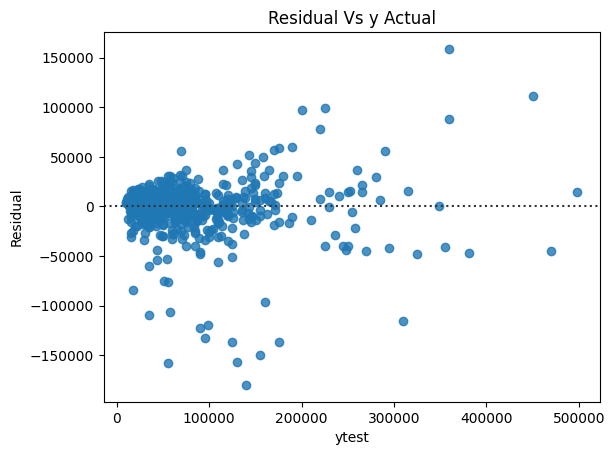

In [47]:
sns.residplot(x='ytest', y='Residual', data=residual_df).set(title='Residual Vs y Actual')
plt.show()

Based on the plot, it can be concluded that:

- Most points are close to the zero line, showing that the model's predictions are generally accurate.
- Points far from the zero line are outliers or inaccurate predictions, especially when the target value (Price) is higher or more variable (over 300,000 SR).
- The even spread of residuals around the zero line suggests that the model's predictions are not biased (residuals are not only above or below the line but on both sides).

**Feature Importance**

In [48]:
prepros

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', RobustScaler(),
                                 ['Year', 'Engine_Size', 'Mileage']),
                                ('oh_cat', OneHotEncoder(),
                                 ['Gear_Type', 'Origin', 'Options']),
                                ('binary_cat', BinaryEncoder(),
                                 ['Type', 'Region', 'Make'])])

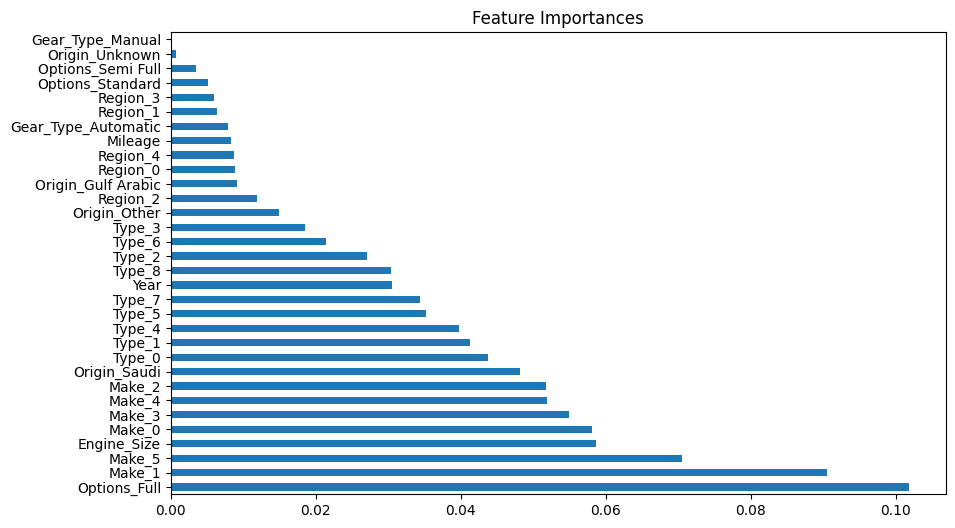

In [52]:
# Check the pipeline definition and correct step name
pipeline = best_model['XGBRegressor']
bestrf_model = pipeline.named_steps['model']

# Extract feature names from each transformer within the ColumnTransformer
feature_names = []

# Iterate through each transformer in the ColumnTransformer
for name, trans, cols in prepros.transformers_:
    if hasattr(trans, 'get_feature_names_out'):
        feature_names.extend(trans.get_feature_names_out(cols))
    else:
        feature_names.extend(cols)

# Convert to numpy array if needed
feature_names = np.array(feature_names)

feature_imp = pd.Series(bestrf_model.feature_importances_, feature_names).sort_values(ascending = False)

plt.figure(figsize=(10, 6))
feature_imp.plot(kind='barh', title='Feature Importances');

- 'Options', 'Make', 'Engine-Size', 'Origin', and 'Type' are the most important features that greatly affect the used car price prediction.
- In contrast, feature 'Gear_Type' has a small affect on the prediction.

## **Impact of Model Implementation**

1. Conventional Method of Prediction

Conventional model pricing is generally calculated based on the year of manufacture and car type.

In [53]:
# Predicted Prices Based on Average Prices for Cars of the Same Type and Year
predict_conventional = df_limit.groupby(['Type', 'Year']).agg({'Actual': 'mean'}).reset_index()
predict_conventional = predict_conventional.rename(columns={'Actual': 'Predicted Conventional'})
predict_conventional

,Type,Year,Predicted Conventional
0,3,2016,45000.0
1,3,2018,54000.0
2,300,2014,45000.0
3,300,2017,94000.0
4,3008,2012,20000.0
...,...,...,...
469,Yukon,2016,145000.0
470,Yukon,2017,125000.0
471,Yukon,2018,146500.0
472,Yukon,2021,310000.0


2. Model Implementation for Prediction

In [54]:
# Predicted Prices Using Machine Learning Model
predict_model = df_limit[['Type', 'Year','Actual', 'Predicted_XGBRegressor']]
predict_model

,Type,Year,Actual,Predicted_XGBRegressor
5177,Hiace,2016,70000,62909.558594
2735,Yukon,2013,75000,66950.812500
4972,Accent,2018,29000,33739.445312
2029,CS35,2021,51000,132417.093750
2068,Azera,2017,61000,73079.742188
...,...,...,...,...
5621,Yukon,2016,145000,146191.156250
3043,Sorento,2015,52000,52033.105469
5527,FJ,2016,100000,100130.710938
3431,Sonata,2019,65000,68561.390625


**Comparing Used Car Price Predictions Using Two Different Methods**

This comparison involves checking the predicted prices for randomly selected car types and years using both methods.

In [55]:
predict_conventional[(predict_conventional['Type'] == 'Hiace') & (predict_conventional['Year'] == 2016)]

,Type,Year,Predicted Conventional
225,Hiace,2016,65000.0


In [56]:
predict_model[(predict_model['Type'] == 'Hiace') & (predict_model['Year'] == 2016)]

,Type,Year,Actual,Predicted_XGBRegressor
5177,Hiace,2016,70000,62909.558594
5586,Hiace,2016,60000,61799.503906


Cars of the same type and year can have different prices. Using a machine learning regression model for price prediction can lead to higher profits compared to conventional methods.

If Syarah.com sells a car for 70,000 SR:

- Profit with conventional prediction: 5,000 SR (70,000 - 65,000)
- Profit with regression prediction: 7,091 SR (70,000 - 62,909)

---

Price prediction using regression model can increase profit up to 1.4% for each car. While the per-car profit increase is small, applying this across all used cars can significantly boost overall profits.

# **Save Model with Pickle**

In [60]:
# Save model
import pickle

estimator = Pipeline([
    ('preprocess', prepros),
    ('model', XGBRegressor(
        subsample=0.6,
        n_estimators=500,
        max_depth=13,
        learning_rate=0.1
    ))
])
estimator.fit(xtrain, ytrain)

pickle.dump(estimator, open('XGBoost_usedcars.sav', 'wb'))

In [62]:
# Load model
filename = 'XGBoost_usedcars.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [63]:
MAPE_loaded_model = (mean_absolute_percentage_error(ytest, loaded_model.predict(xtest)))

## **Conclusion**

1. XGBoost Regressor model is the best model for predicting used car sales prices with parameters:
    - 'model__subsample': 0.6
    - 'model__n_estimators': 500
    - 'model__max_depth': 13
    - 'model__learning_rate': 0.1

2. The MAPE value of the XGBoost Regressor model on train dataset is 26%, meaning if the model predicts the selling price of a newly listed used car, the estimate will deviate by 26% from the actual price.

3. Prediction errors can be caused by other factors or other car specifications beyond the features trained on, because several processes (Feature Engineering, Model Benchmarking with ensemble models, boosting, bagging, and Hyperparameter Tuning) have been performed to reduce errors.

4. The features that most influence 'Price' are 'Options', 'Make','Engine-Size', 'Origin', and 'Type'.

5. The model has limitations, meaning it will perform well if applied within the range of data it has been trained on, which includes:
    - Used cars with a price range of 9000 - 850,000 SR
    - Used cars with a manufacturing year range of 1994 - 2021; an engine size range of 1 - 9 L; and a Mileage range of 100 - 749,000 KM

6. Although the model can be applied to datasets with the above characteristics, it only provides accurate predictions for data:
    - Used cars with actual price range of 11.000 - 498,000 SR
    - Used cars with a manufacturing year range of 1995 - 2021; an engine size range of 1 - 8.8 L; and a Mileage range of 100 - 570,000 KM

8. The impact of using this regression model if implemented by Syarah.com could save time and cost in conducting market research on competitive used car selling prices. Furthermore, Price prediction using regression model can increase profit up to 1.4% for each car.


## **Recommendation**

1. Add the amount of data (especially for prices above 300,000 SR) so that the model can train on more data and produce more accurate predictions with lower MAPE. The model for this prediction case was built using only 3688 clean rows of data (initially 5624 rows), so the data amount could be increased to around > 5000 clean rows.

2. Add features that are likely to correlate with the target 'Price', such as the condition of the car's interior, exterior, and fuel type.

3. Update the data with more recent manufacturing years (> 2021), because the newest car manufacturing year used in this dataset is 2021.